In [166]:
import numpy as np
import pandas as pd

In [167]:
df = pd.read_csv("C:/Users/hp/Desktop/Deep Learning/Logistic_Regression/datasets/data2.csv", encoding='latin-1')
df = df.drop("Unnamed: 0", axis=1)
df.head(2)

,grade1,grade2,label
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0


In [168]:
df.columns

X = df[['grade1', 'grade2']]
X = np.array(X).T

Y = df["label"]
Y = np.array(Y).reshape(-1,1).T

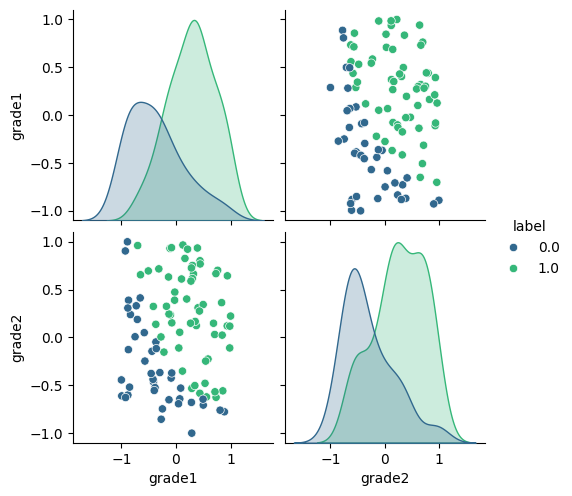

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['grade1', 'grade2', 'label']], hue='label', palette='viridis')
plt.show()

In [170]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 100)
The shape of Y is: (1, 100)
I have m = 100 training examples!


In [171]:
import sklearn
import sklearn.linear_model

clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

c:\Users\hp\Desktop\Deep Learning\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [172]:
LR_predictions = clf.predict(X.T)
# print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
#        '% ' + "(percentage of correctly labelled datapoints)")

accuracy = np.mean(LR_predictions == Y) * 100
print('Accuracy of logistic regression: %.2f%%' % accuracy)

Accuracy of logistic regression: 91.00%


Layer Sizes:

    n_x : Input layer size,
    n_y : Output layer size,
    n_h : Hidden layer size,

Parameters : X, Y,
Returns : n_x, n_h, n_y

In [173]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4

    print("Input layer size: ", n_x)
    print("Output layer size: ", n_y)
    print("Hidden layer size: ", n_h)

    return (n_x, n_h, n_y)

Initialize Model's Parameters FOR 2-Layer Neural Network

    Matrix shape - columns: units, rows: examples

    W1 = weight of matrix of shape (n_h, n_x)
    b1 = bias of vector of shape (n_h, 1)

    W2 = weight of matrix of shape (n_y, n_h)
    b2 = bias of vector of shape (n_y, 1)

Parameters - n_x, x_h, n_y , 

Returns - parameters , 
where parameters is a dictionary with W1, b1, W2, b2 

In [174]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.rand(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.rand(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

Sigmoid

    sigmoid(z) = 1/(1 + e^(-z))

Paramaters - z,  
Returns - s, that is sigmoid of z


In [175]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))

    return s

Forward Propagation - To make predictions

    Z1 = W1.X + b1
    A1 = g1(Z1)

    Z2 = W2.A1 + b2
    A2 = g2(Z2)

A - activation Fuction,
g - any activation function like sigmoid, relu, tanh

Parameters - X, parameters (dictionary that contains W1, b1, W2, b2),   
Returns - A2, cache,    
where cache is a dictionary with Z1, A1, Z2, A2 

    A2 stores predictions

In [176]:
def forward_propagataion(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

Compute the cost - average of individual losses for each data point in the dataset

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

m = total examples or total datapoints in a dataset

Parameters - A2, Y,   
Returns - cost

In [177]:
def compute_cost(A2, Y):
    m = Y.shape[1]

    cost = (-1/m)*( np.sum( ( np.multiply(Y, np.log(A2)) ) + ( np.multiply( (1-Y), np.log(1-A2) ) ) ) )
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.

    return cost

Backward Propagation - update the parameters to minimize the loss

    dZ2 = A2 - Y
    dW2 = 1/m (dZ1 * A1.T)
    db2 = 1/m (np.sum(dZ2, axis=1, keepdims=True))
    dZ1 = (W2.T * dZ2) * (g1'(Z1))
    dW1 = 1/m (dZ1 * X.T)
    db1 = 1/m (np.sum(dZ1, axis=1, keepdims=True))

Note - '*' doesn't always mean matric multiplication, it could be dot product also.  

dQ = derivate of particular variable

Parameters - parameters, cache, X, Y,    
Returns - grads,    
where grads is a dictionary with dW1, db1, dW2, db2

In [178]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = 1/m*(np.dot(dZ2, A1.T))
    db2 = 1/m*(np.sum(dZ2, axis=1, keepdims=True))
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m*(np.dot(dZ1, X.T))
    db1 = 1/m*(np.sum(dZ1, axis=1, keepdims=True))

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

Update Parameters - by using gradient descent rule for optimization

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.


Parameters - parameters, grads, learning_rate    
Returns - parameters (dictionary)

In [179]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - (learning_rate*dW1)
    b1 = b1 - (learning_rate*db1)
    W2 = W2 - (learning_rate*dW2)
    b2 = b2 - (learning_rate*db2)

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

Intergrate everything in model function

Parameters = X, Y, n_h, num_iterations, print_cost
Returns = parameters

In [180]:
def model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    # Gradient Descent - Optimization Algo

    for i in range(0, num_iterations):
        A2, cache = forward_propagataion(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i%1000==0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

Predict

  **Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  

In [181]:
def predict(parameters, X):
    A2, cache = forward_propagataion(X, parameters)
    predictions = np.zeros((1, A2.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0, i]>0.5:
            predictions[0, i] = 1
        else:
            predictions[0, i] = 0

    return predictions

Test the Model

In [183]:
parameters = model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

predictions = predict(parameters, X)
predictions = predictions.flatten()
Y = Y.flatten()

# Calculate accuracy using direct comparison
accuracy = np.mean(predictions == Y) * 100  # Proportion of correct predictions

# Print accuracy
print('Accuracy: %.2f%%' % accuracy)

Input layer size:  2
Output layer size:  1
Hidden layer size:  4
Input layer size:  2
Output layer size:  1
Hidden layer size:  4
Cost after iteration 0: 0.693097
Cost after iteration 1000: 0.031708
Cost after iteration 2000: 0.016216
Cost after iteration 3000: 0.010820
Cost after iteration 4000: 0.008036
Cost after iteration 5000: 0.006354
Cost after iteration 6000: 0.005238
Cost after iteration 7000: 0.004449
Cost after iteration 8000: 0.003863
Cost after iteration 9000: 0.003413
Accuracy: 100.00%
